In [ ]:
%cd drive/MyDrive/Practice/Exam/Round_2/fine_grained

/content/drive/MyDrive/Practice/Exam/Round_2/fine_grained


In [ ]:
import os 
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

%matplotlib inline

In [ ]:
def read_image(path):
    return Image.open(path).convert("RGB")

In [ ]:
path = "fgvc-aircraft-2013b/data"

In [ ]:
train_df = pd.read_csv("train.csv")
val_df = pd.read_csv("val.csv")

In [ ]:
train_val_df = pd.concat([train_df, val_df], axis = 0)

In [ ]:
train_val_df.shape

(6667, 7)

In [ ]:
image_path = os.path.join(path, "image_folder")
image_files = os.listdir(image_path)

In [ ]:
print(len(image_files))

10000


In [ ]:
filename = image_files[1] 

In [ ]:
image = np.array(read_image(os.path.join(image_path, filename)))

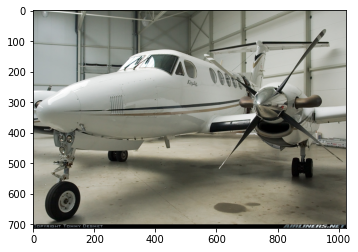

In [ ]:
plt.imshow(image)

In [ ]:
print(image.shape)

(712, 1024, 3)


In [ ]:
bb_file = "images_box.txt"

In [ ]:
bb_path = os.path.join(path, bb_file)

with open(bb_path, 'r') as f:
    bbs = f.readlines()

# xmin, ymin, xmax and ymax
item = {
    "image_file" : [],
    "xmin" : [],
    "ymin": [],
    "xmax" : [],
    "ymax": []
}

for bb in bbs:
    bb = bb.split()
    item["image_file"].append(bb[0] + ".jpg")
    item["xmin"].append(int(bb[1]))
    item["ymin"].append(int(bb[2]))
    item["xmax"].append(int(bb[3]))
    item["ymax"].append(int(bb[4]))


In [ ]:
df = pd.DataFrame(
    item
)

In [ ]:
df.head()

,image_file,xmin,ymin,xmax,ymax
0,1025794.jpg,3,144,998,431
1,0481847.jpg,73,220,1198,508
2,1514522.jpg,7,217,1196,551
3,1340192.jpg,83,155,964,462
4,0810608.jpg,19,146,986,443


In [ ]:
image = np.array(read_image(os.path.join(image_path, image_file)))

In [ ]:
df.to_csv("images_box.csv", index =False)

In [ ]:
df["manufacturer"] = None

In [ ]:
for type_ in ["_train", "_val", "_test"]:
    manu_file =  "images_manufacturer" + type_ + '.txt'
    print(manu_file)
    manu_path = os.path.join(path, manu_file) 
    with open(manu_path, 'r') as f:
        lines = f.readlines()
    for line in lines:
        line = line.split()
        image_id = line[0]
        image_file = image_id + ".jpg"
        manu = line[1:] 
        if len(manu) > 1:
            manu = "".join(manu) 
        df.loc[df["image_file"] == image_file, "manufacturer"] = manu

images_manufacturer_train.txt
images_manufacturer_val.txt
images_manufacturer_test.txt


In [ ]:
df.head()

,image_file,xmin,ymin,xmax,ymax,manufacturer,variant
0,1025794.jpg,3,144,998,431,Boeing,707-320
1,0481847.jpg,73,220,1198,508,Boeing,707-320
2,1514522.jpg,7,217,1196,551,Boeing,707-320
3,1340192.jpg,83,155,964,462,Boeing,707-320
4,0810608.jpg,19,146,986,443,Boeing,707-320


In [ ]:
df["variant"] = None
for type_ in ["_train", "_val", "_test"]:
    manu_file =  "images_variant" + type_ + '.txt'
    print(manu_file)
    manu_path = os.path.join(path, manu_file) 
    with open(manu_path, 'r') as f:
        lines = f.readlines()
    for line in lines:
        line = line.split()
        image_id = line[0]
        image_file = image_id + ".jpg"
        manu = line[1:] 
        if len(manu) > 1:
            manu = "".join(manu) 
        df.loc[df["image_file"] == image_file, "variant"] = manu

images_variant_train.txt
images_variant_val.txt
images_variant_test.txt


In [ ]:
df.head()

,image_file,xmin,ymin,xmax,ymax,manufacturer,variant
0,1025794.jpg,3,144,998,431,Boeing,707-320
1,0481847.jpg,73,220,1198,508,Boeing,707-320
2,1514522.jpg,7,217,1196,551,Boeing,707-320
3,1340192.jpg,83,155,964,462,Boeing,707-320
4,0810608.jpg,19,146,986,443,Boeing,707-320


In [ ]:
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
encoder = OrdinalEncoder()
df["variant"] = encoder.fit_transform(df[["variant"]])
df["manufacturer"] = encoder.fit_transform(df[["manufacturer"]])

In [ ]:
df.to_csv("image_info.csv", index = False)

In [ ]:
for type_ in ["train", "val", "test"]:
    file_ = "images_" + type_ + ".txt"
    path_ = os.path.join(path, file_)
    with open(path_, 'r') as f:
        lines = f.readlines()
        image_files = list(map(lambda x: x.split()[0] + ".jpg", lines))
    if type_ == "train":
        train_df = df[df['image_file'].isin(image_files)]
    elif type_ == "val":
        val_df = df[df["image_file"].isin(image_files)]
    else:
        test_df = df[df["image_file"].isin(image_files)] 

In [ ]:
print(len(train_df))
train_df.head()

3334


,image_file,xmin,ymin,xmax,ymax,manufacturer,variant
0,1025794.jpg,3,144,998,431,4.0,0.0
3,1340192.jpg,83,155,964,462,4.0,0.0
6,0056978.jpg,1,129,891,436,4.0,0.0
9,0698580.jpg,8,164,996,435,4.0,0.0
12,0450014.jpg,29,396,1268,634,4.0,0.0


In [ ]:
print(len(val_df))
val_df.head()

3333


,image_file,xmin,ymin,xmax,ymax,manufacturer,variant
1,0481847.jpg,73,220,1198,508,4.0,0.0
4,0810608.jpg,19,146,986,443,4.0,0.0
7,1514481.jpg,11,206,1194,522,4.0,0.0
10,0887066.jpg,1,47,1007,531,4.0,0.0
13,1318819.jpg,8,199,1196,525,4.0,0.0


In [ ]:
print(len(test_df))
test_df.head()

3333


,image_file,xmin,ymin,xmax,ymax,manufacturer,variant
2,1514522.jpg,7,217,1196,551,4.0,0.0
5,0747566.jpg,48,69,998,348,4.0,0.0
8,1008575.jpg,6,133,1022,469,4.0,0.0
11,0717480.jpg,17,90,1197,555,4.0,0.0
14,0991569.jpg,99,153,981,452,4.0,0.0
